In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/bio/project/data.csv')
df.drop('Unnamed: 32', axis = 1, inplace = True)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#get data in array
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].apply(lambda x: 1 if x == "M" else 0).values

In [0]:
# split data train 80 % and test 20 %
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [0]:
#scale column to have variance = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ANN USING KERAS


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [8]:
# Initialising the ANN
classifier = Sequential()

In [9]:
#first hideen layer
#Get dimension of feature
len(X_train[0])

30

In [10]:

# Adding the input layer and the first hidden layer
#ReLu  
#ReLU function is f(x)=max(0,x)
classifier.add(Dense(activation="relu", input_dim=30, units=32, kernel_initializer="uniform")) # input_dim = dimension of X_train
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1)) 




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=8, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=4, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [0]:
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [13]:
# Compiling the ANN
#Optimizer is chosen as adam for gradient descent.
#Use Binary_crossentropy as the loss function used. 
#measures the performance of a classification model whose output is a probability value between 0 and 1. 
#Cross-entropy loss increases as the predicted probability diverges from the actual label.A perfect model would have a log loss of 0. 
classifier.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
classifier.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
________________________

In [0]:
# split train data again to train and validation
# aprrox train 70% validate 10% test 20%
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=22)

In [0]:
#plot loss
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

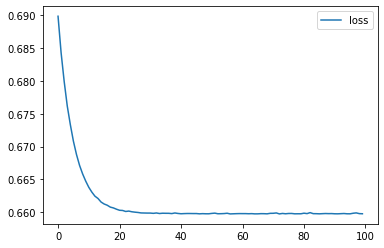

In [16]:
#fit the model
classifier.fit(X_train, y_train,
          # validation_data=(X_val, y_val),
          batch_size=5,
          epochs=100,callbacks=[plot_losses])

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
y_pred = (y_pred > 0.5)

In [19]:
# Making report
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy is:  0.6228070175438597


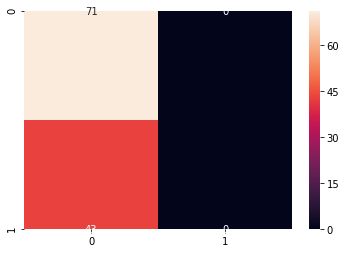

In [20]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [21]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 124.56140350877195%


In [22]:
cm

array([[71,  0],
       [43,  0]])